# generate data based on SEA dataset

In [1]:
from river.datasets import synth
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.metrics import accuracy_score

# Load the dataset
dataset = synth.SEA(variant=1, seed=42).take(2000)
np.random.seed(0)

# Prepare data
X, y = [], []
for x, y_bool in dataset:
    X.append([x[0], x[1]])
    if x[0] + x[1] > 9:
        y.append(1)
    else:
        y.append(0)

X = np.array(X)
y = np.array(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, train_size=1000, random_state=42)

# Initialize and train the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict probabilities on the test set
y_pred_prob = gnb.predict_proba(X_test)

y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
accuracy

dataset2 = synth.SEA(variant=3, seed=42).take(1000)
X_test2, y_test2 = [], []
for x, y_bool in dataset2:
    X_test2.append([x[0], x[1]])
    if x[0] + x[1] > 8.2:
        y_test2.append(1)
    else:
        y_test2.append(0)

X_test2 = np.array(X_test2)
y_test2 = np.array(y_test2)

y_pred_prob2 = gnb.predict_proba(X_test2)
y_pred2 = gnb.predict(X_test2)
accuracy2 = accuracy_score(y_pred2, y_test2)

print("Accuracy: for test set 1 and 2 are", accuracy, " and ", accuracy2)
uncertainty_y_test = 1 - np.max(y_pred_prob, axis=1)
uncertainty_y_test2 = 1 - np.max(y_pred_prob2, axis=1)

# Add correct1 and correct2 arrays indicating correct (1) and incorrect (0) predictions
correct1 = (y_pred == y_test).astype(int)
correct2 = (y_pred2 == y_test2).astype(int)


Accuracy: for test set 1 and 2 are 0.958  and  0.958


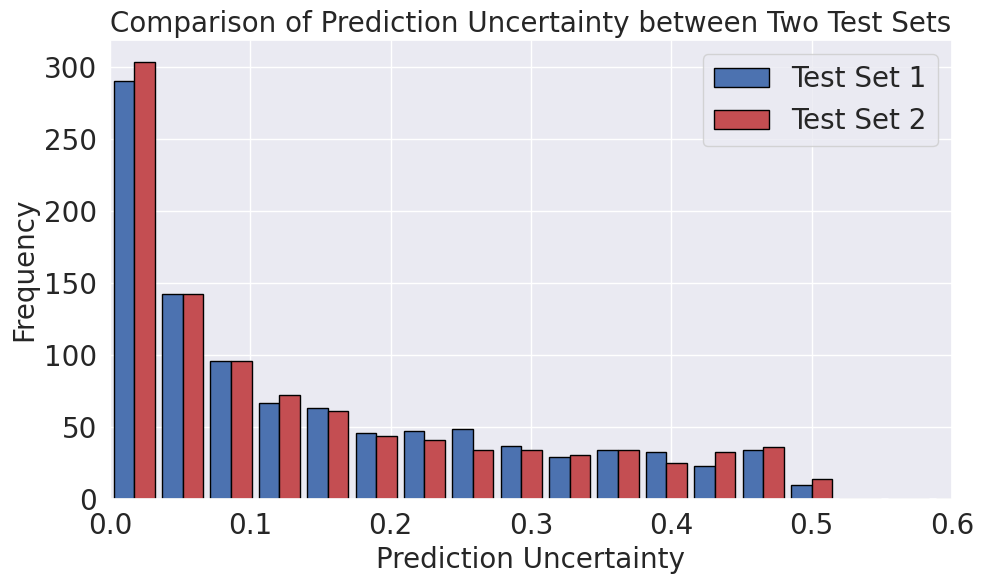

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume uncertainty_y_test and uncertainty_y_test2 are calculated based on previous description
sns.set_theme(style="darkgrid", palette="muted")
sns.set_color_codes("muted")

# Calculate histogram data for prediction uncertainty of two test sets
bins = np.linspace(0, 1, 30)  # Generate bins array to ensure both histograms use same bins

plt.figure(figsize=(10, 6))
your_colors = [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)]
blue = your_colors[0]
red = your_colors[1]

# Plot side-by-side histograms for uncertainty of two test sets
plt.hist([uncertainty_y_test, uncertainty_y_test2], bins, label=['Test Set 1', 'Test Set 2'], color=[blue, red], alpha=1, rwidth=0.85, edgecolor='black')
plt.xlim(0, 0.6)
fontsize = 20
plt.xlabel('Prediction Uncertainty', fontsize=fontsize)
plt.ylabel('Frequency', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title('Comparison of Prediction Uncertainty between Two Test Sets', fontsize=20)
plt.legend(loc='upper right', prop={'size': fontsize})
plt.tight_layout()
# plt.savefig('fig1-uncertainty.png', dpi=200)
plt.show()


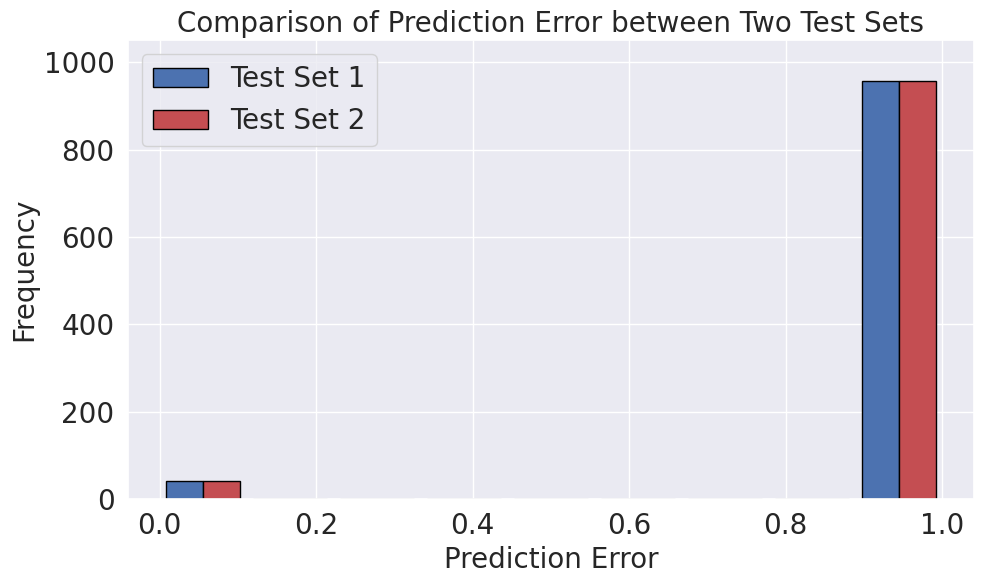

In [3]:
error1 = (y_pred == y_test).astype(int)
error2 = (y_pred2 == y_test2).astype(int)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume uncertainty_y_test and uncertainty_y_test2 are calculated based on previous description
sns.set_theme(style="darkgrid", palette="muted")
sns.set_color_codes("muted")

# Calculate histogram data for prediction uncertainty of two test sets
bins = np.linspace(0, 1, 10)  # Generate bins array to ensure both histograms use same bins

plt.figure(figsize=(10, 6))
your_colors = [(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)]
blue = your_colors[0]
red = your_colors[1]

fontsize = 20
# Plot side-by-side histograms for uncertainty of two test sets
plt.hist([error1, error2], bins, label=['Test Set 1', 'Test Set 2'], color=[blue, red], alpha=1, rwidth=0.85, edgecolor='black')
plt.ylim(0, 1050)
plt.xlabel('Prediction Error', fontsize=fontsize)
plt.ylabel('Frequency', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.title('Comparison of Prediction Error between Two Test Sets', fontsize=20)
plt.legend(loc='upper left', prop={'size': fontsize})
plt.tight_layout()
# plt.savefig('fig1-error.png', dpi=200)
plt.show()


In [4]:
import importlib
import ei_detector
importlib.reload(ei_detector)
from ei_detector import EIKMEANS
ei_detector = EIKMEANS(k=5)
pvalue = ei_detector.two_sample_test(uncertainty_y_test, uncertainty_y_test2, correct1, correct2, dataset_name='sea0')
print("pvalue:", pvalue)
if pvalue < 0.05:
    print("Drift detected!")
else:
    print("No drift detected.")

pvalue: 0.0
Drift detected!


In [5]:
import numpy
print("Numpy version:", numpy.__version__)
# Numpy version: 1.23.5



Numpy version: 1.23.5
